In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline


import gc
import os 
import fpfs
import fitsio
import galsim
import logging
import matplotlib.pylab as plt
from astropy.visualization import simple_norm
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy.lib.recfunctions as rfn

import matplotlib as mpl
mpl.rcParams['axes.linewidth'] = 2.0 #set the value globally

In [ ]:
outDir='galaxy_test_cosmo250_psf60'
a=fpfs.simutil.make_cosmo_sim(outDir,'g1-0000',Id0=0,ny=256,nx=256,do_write=False,return_array=True)
a=a[64:-64,64:-64]
plt.close()
plt.imshow(a,aspect='equal',cmap='RdYlBu_r',origin='lower',interpolation='None',\
             norm=simple_norm(a,'asinh',asinh_a=0.1,min_cut=-0.01,max_cut=0.2))
gc.collect()

In [ ]:
a=fpfs.simutil.make_cosmo_sim(outDir,'g1-0000',Id0=1,ny=256,nx=256,do_write=False,return_array=True)
a=a[64:-64,64:-64]
plt.close()
outDir='galaxy_test_cosmo250_psf60'
plt.imshow(a,aspect='equal',cmap='RdYlBu_r',origin='lower',interpolation='None',\
             norm=simple_norm(a,'asinh',asinh_a=0.1,min_cut=-0.01,max_cut=0.2))
gc.collect()

In [ ]:
outDir='galaxy_test_cosmo250_psf60'
a=fpfs.simutil.make_cosmo_sim(outDir,'g1-0000',Id0=2,ny=256,nx=256,do_write=False,return_array=True)
a=a[64:-64,64:-64]
plt.close()
plt.imshow(a,aspect='equal',cmap='RdYlBu_r',origin='lower',interpolation='None',\
             norm=simple_norm(a,'asinh',asinh_a=0.1,min_cut=-0.01,max_cut=0.2))
gc.collect()

In [74]:
rcut=16
scale=0.168
ngrid=256
beg =   ngrid//2-rcut
end =   beg+2*rcut
psfFWHM =   0.6
psfInt  =   galsim.Moffat(beta=3.5,fwhm=psfFWHM,trunc=psfFWHM*4.)
psfInt  =   psfInt.shear(e1=0.02,e2=-0.02)
psfInt  =   psfInt.shift(
    dx  =   0.5*scale,
    dy  =   0.5*scale,
)
ig=20

outDir='galaxy_test_cosmo250_psf60'
#outDir='galaxy_cosmo250_psf60'
psfData =   psfInt.drawImage(nx=ngrid,ny=ngrid,scale=scale).array[beg:end,beg:end]
results=[]
fpTask  =   fpfs.image.measure_source(psfData,noiFit=0.,beta=0.75)
for _ in range(4):
    gal=fpfs.simutil.make_cosmo_sim(outDir,'g1-0000',Id0=_+4*ig,ny=256,nx=256,rfrac=0.2,do_write=False,return_array=True)
    print(gal.shape)
    gal =   gal[beg:end,beg:end]
    modes=  fpTask.measure(gal)
    
    results.append(modes)
plt.close()

(256, 256)
(256, 256)
(256, 256)
(256, 256)


20

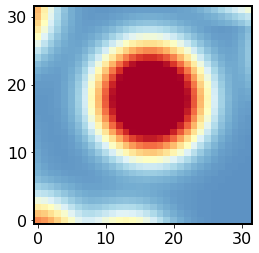

In [75]:
plt.imshow(gal,aspect='equal',cmap='RdYlBu_r',origin='lower',interpolation='None',\
             norm=simple_norm(gal,'asinh',asinh_a=0.1,min_cut=-0.01,max_cut=0.2))
gc.collect()

In [76]:
gc.collect()
mms =   rfn.stack_arrays(results,usemask=False)
ells=   fpfs.catalog.fpfsM2E(mms,const=12,noirev=False)
resp=np.average(ells['fpfs_R1E'])
shear=np.average(ells['fpfs_e1'])/resp

In [77]:
(shear+0.02)/0.02

-7.645629779475666e-05